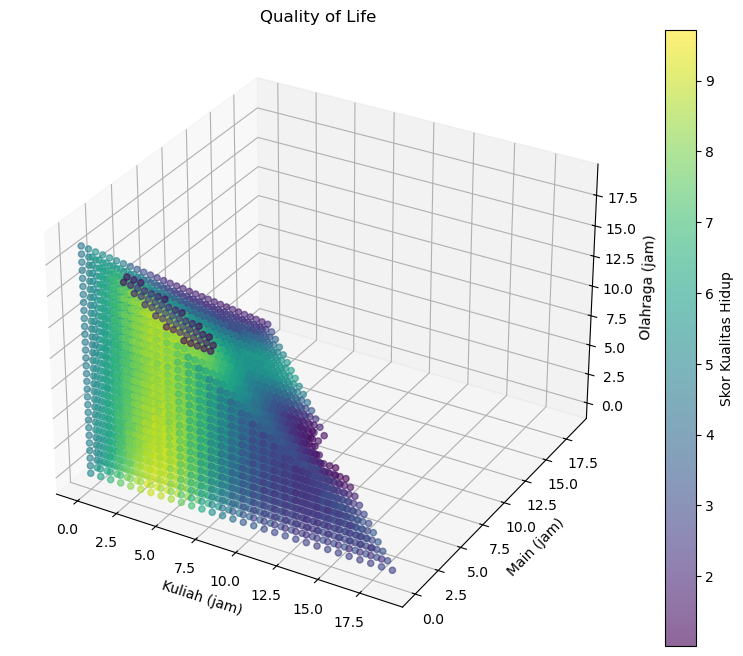

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat = 5.33
res = 30 

# --- Grid setup 3D ---
xmin, xmax = 0, 24-istirahat
ymin, ymax = 0, 24-istirahat
wmin, wmax = 0, 24-istirahat 

x = np.linspace(xmin, xmax, res)  
y = np.linspace(ymin, ymax, res) 
w = np.linspace(wmin, wmax, res)  

X, Y, W = np.meshgrid(x, y, w)

kuliah_pref = np.exp(-((X - 4.0)**2) / (4**2))
main_pref = np.exp(-((Y - 2.0)**2) / (4**2))

# Preferensi olahraga diubah menjadi 2 menit (0.033 jam) dan dibuat sangat tajam -->
olahraga_pref = np.exp(-((W - 0.033)**2) / (0.1**2)) 

# --- FENOMENA PENALTI ---
total_waktu = X + Y + W
total_penalty = 0.2 * np.exp(total_waktu / 24.0)
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)
NPM =  75
np.random.seed(NPM)
ripple = 0.2 * np.sin(0.5 * X) * np.cos(0.5 * Y) * np.sin(0.5*W)
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

Z = 10.0 * (0.6 * kuliah_pref + 0.35 * main_pref + 0.05 * olahraga_pref) 

Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
Z -= 10.0 * np.maximum(total_waktu - (24.0 - istirahat), 0.0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

mask = Z > 1 

sc = ax.scatter(X[mask], Y[mask], W[mask], c=Z[mask], cmap='viridis', marker='o', alpha=0.6)

ax.set_xlabel('Kuliah (jam)')
ax.set_ylabel('Main (jam)')
ax.set_zlabel('Olahraga (jam)')
plt.title('Quality of Life')

cbar = plt.colorbar(sc)
cbar.set_label('Skor Kualitas Hidup')

plt.show()

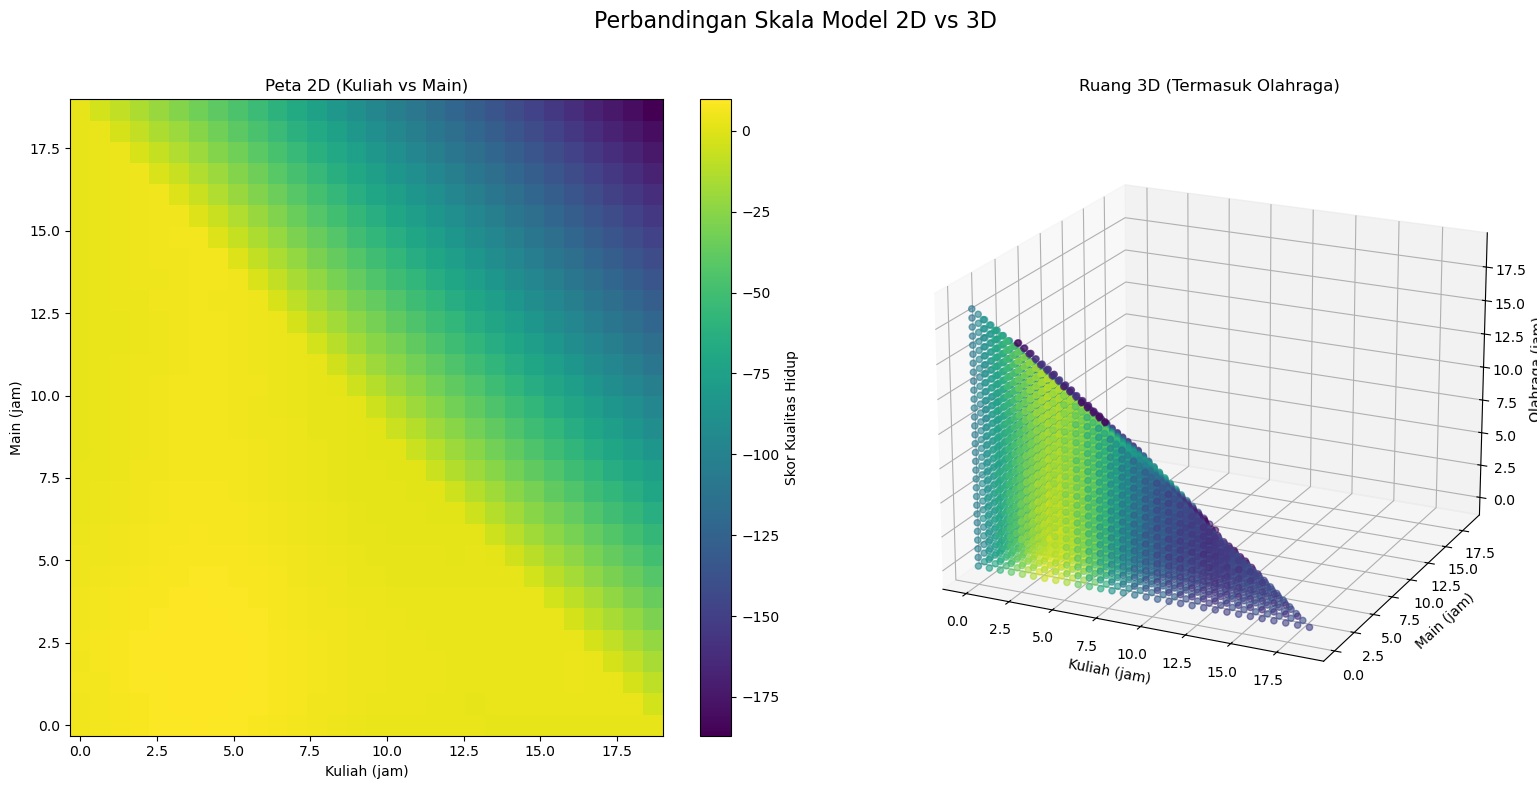

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat = 5.33
res = 30 

xmin, xmax = 0, 24-istirahat
ymin, ymax = 0, 24-istirahat
wmin, wmax = 0, 24-istirahat

x = np.linspace(xmin, xmax, res)  # kuliah
y = np.linspace(ymin, ymax, res)  # main
w = np.linspace(wmin, wmax, res)  # olahraga

X, Y, W = np.meshgrid(x, y, w)

kuliah_pref = np.exp(-((X - 4.0)**2) / (4**2))
main_pref = np.exp(-((Y - 2.0)**2) / (4**2))
olahraga_pref = np.exp(-((W - 0.033)**2) / (0.1**2)) 

total_waktu = X + Y + W
total_penalty = 0.2 * np.exp(total_waktu / 24.0)
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)
NPM = 75
np.random.seed(NPM)
ripple = 0.2 * np.sin(0.5 * X) * np.cos(0.5 * Y) * np.sin(0.5*W)
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

Z = 10.0 * (0.6 * kuliah_pref + 0.35 * main_pref + 0.05 * olahraga_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
Z -= 10.0 * np.maximum(total_waktu - (24.0 - istirahat), 0.0)
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
Z_2D = Z[:, :, 0] 
X_2D, Y_2D = np.meshgrid(x, y) 

c = ax1.pcolormesh(X_2D, Y_2D, Z_2D, cmap='viridis', shading='auto')
ax1.set_title('Peta 2D (Kuliah vs Main)')
ax1.set_xlabel('Kuliah (jam)')
ax1.set_ylabel('Main (jam)')
fig.colorbar(c, ax=ax1, label='Skor Kualitas Hidup')

ax2 = fig.add_subplot(1, 2, 2, projection='3d') # 
mask = Z > 1 

sc = ax2.scatter(X[mask], Y[mask], W[mask], c=Z[mask], cmap='viridis', marker='o', alpha=0.6)
ax2.set_title('Ruang 3D (Termasuk Olahraga)')
ax2.set_xlabel('Kuliah (jam)')
ax2.set_ylabel('Main (jam)')
ax2.set_zlabel('Olahraga (jam)')

ax2.view_init(elev=20., azim=-65)

plt.suptitle('Perbandingan Skala Model 2D vs 3D', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [19]:
import numpy as np
from scipy.optimize import differential_evolution

istirahat = 5.33
ideal_kuliah = 4.0
ideal_main = 2.0
ideal_olahraga = 0.033 # 2 menit

def calculate_quality_of_life(params):
    """
    Menghitung skor Quality of Life berdasarkan parameter input.
    params[0]: jam kuliah
    params[1]: jam main
    params[2]: jam olahraga
    """
    kuliah, main, olahraga = params

    kuliah_pref = np.exp(-((kuliah - ideal_kuliah)**2) / (4**2))
    main_pref = np.exp(-((main - ideal_main)**2) / (4**2))
    olahraga_pref = np.exp(-((olahraga - ideal_olahraga)**2) / (0.1**2))

    total_waktu = kuliah + main + olahraga
    penalti_waktu_berlebih = 10.0 * max(total_waktu - (24.0 - istirahat), 0.0)
    
    total_penalty_sirkadian = 0.2 * np.exp(total_waktu / 24.0)
    kebanyakan_main = 1 * np.exp(-((kuliah - 2.0)**2 + (main - 12.0)**2) / 0.8)
    kebanyakan_lembur = 0.8 * np.exp(-((kuliah - 13.0)**2 + (main - 1.0)**2) / 0.6)

    Z = 10.0 * (0.6 * kuliah_pref + 0.35 * main_pref + 0.05 * olahraga_pref)
    Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty_sirkadian - penalti_waktu_berlebih
    return -Z

maks_waktu_aktivitas = 24.0 - istirahat
bounds = [
    (0, maks_waktu_aktivitas),  # Batasan untuk jam kuliah
    (0, maks_waktu_aktivitas),  # Batasan untuk jam main
    (0, maks_waktu_aktivitas)   # Batasan untuk jam olahraga
]
print("Mencari titik optimum secara numerik...")
result = differential_evolution(calculate_quality_of_life, bounds, strategy='best1bin', tol=1e-6)
print("Pencarian selesai!")

if result.success:
    optimal_params = result.x
    max_qol_score = -result.fun # Kembalikan ke nilai positif
    
    print("\n--- TITIK OPTIMUM DITEMUKAN ---")
    print(f"Jam Kuliah   : {optimal_params[0]:.2f} jam")
    print(f"Jam Main     : {optimal_params[1]:.2f} jam")
    print(f"Jam Olahraga : {optimal_params[2]:.2f} jam")
    print("---------------------------------")
    total_jam_aktivitas = sum(optimal_params)
    print(f"Total Jam Aktivitas : {total_jam_aktivitas:.2f} jam")
    print(f"Sisa Waktu          : {maks_waktu_aktivitas - total_jam_aktivitas:.2f} jam")
    print(f"\nSkor Kualitas Hidup Maksimum: {max_qol_score:.2f}")
else:
    print("\nOptimizer tidak berhasil menemukan solusi yang konvergen.")
    print(f"Pesan: {result.message}")

Mencari titik optimum secara numerik...
Pencarian selesai!

--- TITIK OPTIMUM DITEMUKAN ---
Jam Kuliah   : 3.99 jam
Jam Main     : 1.98 jam
Jam Olahraga : 0.03 jam
---------------------------------
Total Jam Aktivitas : 5.99 jam
Sisa Waktu          : 12.68 jam

Skor Kualitas Hidup Maksimum: 9.74
